<a href="https://colab.research.google.com/github/Annabelle2915/Machine-Learning-Projects/blob/main/HousingPriceSimulator(FYP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Acquisition**

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import bone_marrow.csv dataset to path variable from google drive
import pandas as pd
path = "/content/gdrive/MyDrive/Colab Notebooks/Housing_Data.csv"

# Assign dataset to dataframe named ori_df from variable path
df = pd.read_csv(path)

<ipython-input-43-73f28af54aeb>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


# **Data Understanding**

In [ ]:
# Summary of Pandas DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41750 entries, 0 to 41749
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   no                                 41750 non-null  int64  
 1   Date                               41750 non-null  object 
 2   No.                                41750 non-null  int64  
 3   Mukim (Sub-district)               41750 non-null  object 
 4   Section                            41750 non-null  object 
 5   Jen                                41750 non-null  object 
 6   No.Lot/Plot                        41749 non-null  object 
 7   Siri/Status Lot (Nov-08)           41750 non-null  object 
 8   Tarikh                             41750 non-null  object 
 9   Luas Lot                           41750 non-null  object 
 10  Unit                               41750 non-null  object 
 11  Jen.Hakmilik                       41747 non-null  obj

In [ ]:
# Summary numerical statistics for the remaining columns in the DataFrame
df.describe()

,no,No.,Tenure Type,Lease Term,Expiry of leasehold term (years),Bil. Tkt. Atas Tanah,Bil. Bilik Tidur,Luas Bgn Utama (mp),p/1000,LOCATION (DISTANCE FROM KL),DISTANCE FROM CBD,DISTANCE TO NEAREST SHOPPING MALL,DISTANCE TO NEAREST SUPERMARKET,Syer,HOUSE PRICE
count,"41,750","41,750","41,750","14,058","41,750","41,750","41,750","41,750","41,750","41,750","41,750","41,750","41,749","41,750","41,750"
mean,"22,164",962,0,99,160,2,3,135,498,23,12,4,2,1,"497,927"
std,"12,947",677,0,0,56,0,1,48,314,6,6,3,2,0,"313,906"
min,1,1,0,99,42,1,1,41,10,8,0,0,0,0,"10,000"
25%,"10,776",382,0,99,90,2,3,101,275,18,7,2,1,1,"275,000"
50%,"22,422",868,0,99,200,2,3,131,420,22,12,3,2,1,"420,000"
75%,"33,540","1,451",1,99,200,2,4,164,650,27,15,5,3,1,"650,000"
max,"44,331","2,921",1,99,200,5,7,571,"3,800",38,25,12,10,1,"3,800,000"


In [ ]:
df.head()

,no,Date,No.,Mukim (Sub-district),Section,Jen,No.Lot/Plot,Siri/Status Lot (Nov-08),Tarikh,Luas Lot,...,Region,LOCATION (DISTANCE FROM KL),DISTANCE FROM CBD,DISTANCE TO NEAREST SHOPPING MALL,DISTANCE TO NEAREST SUPERMARKET,Syer,Dibayar,HOUSE PRICE,race penjual,race pembeli
0,1,Nov-08,2,BKT RAJA,,HAKMILIK MUKTAMAD,12020,TUNGGAL,04/06/2008,163,...,Shah Alam,35,18,7,8,1,"300,000","300,000",Malay,Malay
1,2,Nov-08,5,BKT RAJA,,NO. PEMAJU,82,TUNGGAL,01/07/2008,164,...,Shah Alam,34,16,5,3,1,"363,000","363,000",Others,Indian
2,3,Nov-08,6,BKT RAJA,,NO. PEMAJU,A50,TUNGGAL,21/05/2008,130,...,Shah Alam,32,15,10,6,1,"290,000","290,000",Malay,Malay
3,4,Nov-08,7,BKT RAJA,,NO. PEJABAT TANAH,12437,TUNGGAL,08/10/2008,153,...,Shah Alam,37,20,4,1,1,"345,000","345,000",Chinese,Chinese
4,5,Nov-08,8,BKT RAJA,,NO. PEJABAT TANAH,12512,TUNGGAL,19/08/2008,153,...,Shah Alam,37,20,4,1,1,"320,000","320,000",Chinese,Chinese


In [ ]:
# Get the list of column names
columns = df.columns.tolist()

# Separate the columns into categorical and numerical
categorical_columns = []
numerical_columns = []

for column in columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Print the categorical columns
print("Categorical columns:")
for column in categorical_columns:
    print("- " + column)
print ("\n")
# Print the numerical columns
print("Numerical columns:")
for column in numerical_columns:
    print("- " + column)


Categorical columns:
- Date
- Mukim (Sub-district)
- Section
- Jen
- No.Lot/Plot
- Siri/Status Lot (Nov-08)
- Tarikh  
- Luas Lot 
- Unit
- Jen.Hakmilik
- # Hakmilik
- Jenis Tanah
- TENURE
- Tarikh Luput
- Jenis Bangunan
- Bil. Tkt. Bwh Tanah 
- Nombor Rss Dan  Grid
- Grid (Nov-08)
- Alamat (Address)
- Kawasan
- Region
-    Dibayar    
- race penjual
- race pembeli


Numerical columns:
- no
- No.
- Tenure Type
- Lease Term
- Expiry of leasehold term (years)
- Bil. Tkt. Atas Tanah
- Bil. Bilik Tidur
- Luas Bgn Utama (mp)
- p/1000
- LOCATION (DISTANCE FROM KL)
- DISTANCE FROM CBD
- DISTANCE TO NEAREST SHOPPING MALL
- DISTANCE TO NEAREST SUPERMARKET
- Syer
- HOUSE PRICE


In [ ]:
# Categorical data columns
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Categorical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()

# Numerical data columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    unique_values = df[column].unique()
    print(f"Numerical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()


Categorical Column: Date
Unique Values: ['Nov-08' 'Dec-08' 'Jan-09' 'Feb-09' 'Mar-09' 'Apr-09' 'May-09' 'Jun-09'
 'Jul-09' 'Aug-09' 'Sep-09' 'Oct-09' 'Nov-09' 'Dec-09' 'Jan-10' 'Feb-10'
 'Mar-10' 'Apr-10' 'May-10' 'Jun-10' 'Jul-10' 'Aug-10' 'Sep-10' 'Oct-10'
 'Nov-10' 'Dec-10' 'Jan-11' 'Feb-11' 'Mar-11' 'Apr-11' 'May-11' 'Jun-11'
 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11' 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12'
 'Mar-12' 'Apr-12' 'Jun-12' 'Jul-12' 'Aug-12' 'Sep-12' 'Oct-12' 'Nov-12'
 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13' 'Apr-13' 'May-13' 'Jun-13' 'Jul-13'
 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14'
 'Apr-14' 'May-14' 'Jun-14' 'Jul-14' 'Aug-14' 'Sep-14' 'Oct-14' 'Nov-14'
 'Dec-14' 'Jan-15' 'Feb-15' 'Mar-15' 'Apr-15' 'May-15' 'Jun-15' 'Jul-15'
 'Aug-15' 'Sep-15' 'Oct-15' 'Nov-15' 'Dec-15' 'Jan-16' 'Feb-16']

Categorical Column: Mukim (Sub-district)
Unique Values: ['BKT RAJA' 'DAMANSARA ' 'PETALING (PT) ' 'SG BULUH' 'PETALING JAYA '
 'SHAH ALAM ' 'BT TIGA ' 'BUKIT RAJA' 

<ipython-input-49-dbe660a989ef>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


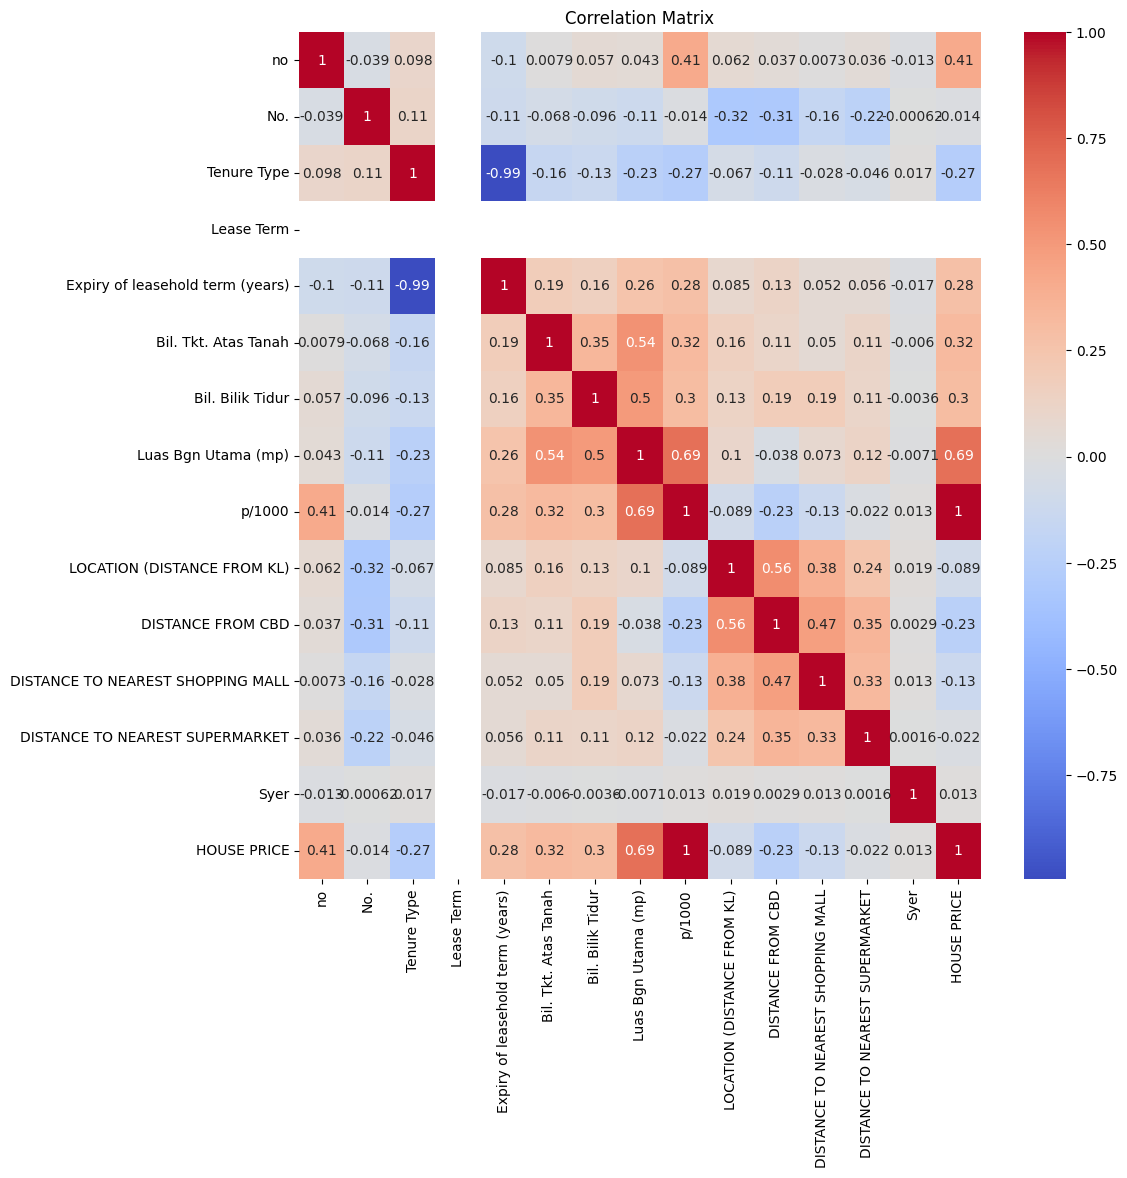

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(11, 11))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



# **Data Pre-processing**




**Data Cleaning**

*Remove Trailing White Spaces*

In [ ]:
# Remove leading and trailing whitespace from column names
df.columns = df.columns.str.strip()

# Remove leading and trailing whitespace from column values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)



In [ ]:
# Print every columns in the dataset
print(df.columns)


Index(['no', 'Date', 'No.', 'Mukim (Sub-district)', 'Section', 'Jen',
       'No.Lot/Plot', 'Siri/Status Lot (Nov-08)', 'Tarikh', 'Luas Lot', 'Unit',
       'Jen.Hakmilik', '# Hakmilik', 'Jenis Tanah', 'TENURE', 'Tenure Type',
       'Lease Term', 'Tarikh Luput', 'Expiry of leasehold term (years)',
       'Jenis Bangunan', 'Bil. Tkt. Atas Tanah', 'Bil. Tkt. Bwh Tanah',
       'Bil. Bilik Tidur', 'Luas Bgn Utama (mp)', 'Nombor Rss Dan  Grid',
       'Grid (Nov-08)', 'Alamat (Address)', 'Kawasan', 'p/1000', 'Region',
       'LOCATION (DISTANCE FROM KL)', 'DISTANCE FROM CBD',
       'DISTANCE TO NEAREST SHOPPING MALL', 'DISTANCE TO NEAREST SUPERMARKET',
       'Syer', 'Dibayar', 'HOUSE PRICE', 'race penjual', 'race pembeli'],
      dtype='object')


**Data Transformation**

In [ ]:
import numpy as np

df_cleaned=df.copy()

# Convert "Tenure Type" column to string type
df_cleaned['Tenure Type'] = df_cleaned['Tenure Type'].astype(str)

import re
# Replace empty or missing values with NaN
df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].replace('', np.nan)

# Remove commas and other non-numeric characters from Luas Lot
df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].str.replace(',', '').apply(lambda x: re.sub(r'[^\d.]', '', str(x)))

# Convert empty strings to NaN
df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].replace('', np.nan)

# Convert Luas Lot to float type
df_cleaned['Luas Lot'] = df_cleaned['Luas Lot'].astype(float)


# Convert 'Dibayar', 'race pembeli', and 'race penjual' to lowercase if needed
# Convert 'Dibayar' column to string type

df_cleaned['Dibayar'] = df_cleaned['Dibayar'].astype(str)

# Remove commas and other non-numeric characters from 'Dibayar'
df_cleaned['Dibayar'] = df_cleaned['Dibayar'].str.replace(',', '')

# Remove rows with invalid values in 'Dibayar' column
df_cleaned = df_cleaned[df_cleaned['Dibayar'].str.isnumeric()]

# Convert 'Dibayar' to float
df_cleaned['Dibayar'] = df_cleaned['Dibayar'].astype(float)



df_cleaned['race pembeli'] = df_cleaned['race pembeli'].str.lower()
df_cleaned['race penjual'] = df_cleaned['race penjual'].str.lower()
df_cleaned['race pembeli'] = df_cleaned['race pembeli'].replace('Chinese', 'chinese')
df_cleaned['race penjual'] = df_cleaned['race penjual'].replace('Chinese', 'chinese')








<ipython-input-52-e9062262b253>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Dibayar'] = df_cleaned['Dibayar'].astype(float)
<ipython-input-52-e9062262b253>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['race pembeli'] = df_cleaned['race pembeli'].str.lower()
<ipython-input-52-e9062262b253>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

*Handling Meaningless Column*

In [ ]:
# Drop the 'No' column as it is a index from df
df_cleaned.drop('no', axis=1, inplace=True)


<ipython-input-53-4cb57e76f90a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('no', axis=1, inplace=True)


*Handling Missing Values*

In [ ]:
# Handling standard missing values
df.isnull().sum()

no                                       0
Date                                     0
No.                                      0
Mukim (Sub-district)                     0
Section                                  0
Jen                                      0
No.Lot/Plot                              1
Siri/Status Lot (Nov-08)                 0
Tarikh                                   0
Luas Lot                                 0
Unit                                     0
Jen.Hakmilik                             3
# Hakmilik                               0
Jenis Tanah                              0
TENURE                                   0
Tenure Type                              0
Lease Term                           27692
Tarikh Luput                         27692
Expiry of leasehold term (years)         0
Jenis Bangunan                           0
Bil. Tkt. Atas Tanah                     0
Bil. Tkt. Bwh Tanah                      0
Bil. Bilik Tidur                         0
Luas Bgn Ut

In [ ]:
empty_value_representation = ''  # Specify the empty value representation you want to replace
df_cleaned.replace(empty_value_representation, np.nan, inplace=True)

df_cleaned.isnull().sum()


Date                                     0
No.                                      0
Mukim (Sub-district)                     0
Section                              35683
Jen                                      2
No.Lot/Plot                              1
Siri/Status Lot (Nov-08)                 0
Tarikh                                   0
Luas Lot                             16383
Unit                                     0
Jen.Hakmilik                             3
# Hakmilik                               3
Jenis Tanah                             12
TENURE                                   0
Tenure Type                              0
Lease Term                           27691
Tarikh Luput                         27691
Expiry of leasehold term (years)         0
Jenis Bangunan                           0
Bil. Tkt. Atas Tanah                     0
Bil. Tkt. Bwh Tanah                  31653
Bil. Bilik Tidur                         0
Luas Bgn Utama (mp)                      0
Nombor Rss 

In [ ]:
df_cleaned.drop('Section', axis=1, inplace=True)
df_cleaned.drop(['Nombor Rss Dan  Grid', 'Grid (Nov-08)'], axis=1, inplace=True)


categorical_features = ['Jen', 'No.Lot/Plot', 'Jen.Hakmilik', '# Hakmilik', 'Jenis Tanah','Alamat (Address)', 'Tarikh Luput']
for feature in categorical_features:
    mode_value = df_cleaned[feature].mode()[0]
    df_cleaned[feature].fillna(mode_value, inplace=True)

numerical_features = ['Lease Term','Bil. Tkt. Bwh Tanah', 'DISTANCE TO NEAREST SUPERMARKET']
for feature in numerical_features:
    median_value = df_cleaned[feature].median()
    df_cleaned[feature].fillna(median_value, inplace=True)





In [ ]:
from sklearn.linear_model import LinearRegression
import re
import locale

# Set the locale for numeric formatting
locale.setlocale(locale.LC_NUMERIC, '')

# Convert 'HOUSE PRICE' to string type
df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].astype(str)

# Remove commas from 'HOUSE PRICE'
df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].str.replace(',', '')

# Convert 'HOUSE PRICE' to numerical format
df_cleaned['HOUSE PRICE'] = df_cleaned['HOUSE PRICE'].apply(lambda x: locale.atof(x) if pd.notnull(x) else x)

# Drop rows with missing values in 'HOUSE PRICE' or 'Luas Lot'
df_cleaned = df_cleaned.dropna(subset=['HOUSE PRICE', 'Luas Lot'])

# Create a regression model using HOUSE PRICE as the predictor and Luas Lot as the target variable
regression_model = LinearRegression()
regression_model.fit(df_cleaned[['HOUSE PRICE']], df_cleaned['Luas Lot'])

# Identify rows with missing values in 'Luas Lot'
missing_data = df_cleaned[df_cleaned['Luas Lot'].isnull()]

if not missing_data.empty:
    # Predict missing values in 'Luas Lot' based on 'HOUSE PRICE'
    missing_data['Luas Lot'] = regression_model.predict(missing_data[['HOUSE PRICE']])

    # Update the original dataframe with the imputed values
    df_cleaned.update(missing_data)




In [ ]:
print(df_cleaned.isnull().sum())


Date                                 0
No.                                  0
Mukim (Sub-district)                 0
Jen                                  0
No.Lot/Plot                          0
Siri/Status Lot (Nov-08)             0
Tarikh                               0
Luas Lot                             0
Unit                                 0
Jen.Hakmilik                         0
# Hakmilik                           0
Jenis Tanah                          0
TENURE                               0
Tenure Type                          0
Lease Term                           0
Tarikh Luput                         0
Expiry of leasehold term (years)     0
Jenis Bangunan                       0
Bil. Tkt. Atas Tanah                 0
Bil. Tkt. Bwh Tanah                  0
Bil. Bilik Tidur                     0
Luas Bgn Utama (mp)                  0
Alamat (Address)                     0
Kawasan                              0
p/1000                               0
Region                   

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25366 entries, 16384 to 41749
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               25366 non-null  object 
 1   No.                                25366 non-null  int64  
 2   Mukim (Sub-district)               25366 non-null  object 
 3   Jen                                25366 non-null  object 
 4   No.Lot/Plot                        25366 non-null  object 
 5   Siri/Status Lot (Nov-08)           25366 non-null  object 
 6   Tarikh                             25366 non-null  object 
 7   Luas Lot                           25366 non-null  float64
 8   Unit                               25366 non-null  object 
 9   Jen.Hakmilik                       25366 non-null  object 
 10  # Hakmilik                         25366 non-null  object 
 11  Jenis Tanah                        25366 non-null 

In [ ]:
# Categorical data columns
categorical_columns = df_cleaned.select_dtypes(include='object').columns
for column in categorical_columns:
    unique_values = df_cleaned[column].unique()
    print(f"Categorical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()

# Numerical data columns
numerical_columns = df_cleaned.select_dtypes(include=['int', 'float']).columns
for column in numerical_columns:
    unique_values = df_cleaned[column].unique()
    print(f"Numerical Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()


Categorical Column: Date
Unique Values: ['Mar-11' 'Apr-11' 'May-11' 'Jun-11' 'Jul-11' 'Aug-11' 'Sep-11' 'Oct-11'
 'Nov-11' 'Dec-11' 'Jan-12' 'Feb-12' 'Mar-12' 'Apr-12' 'Jun-12' 'Jul-12'
 'Aug-12' 'Sep-12' 'Oct-12' 'Nov-12' 'Dec-12' 'Jan-13' 'Feb-13' 'Mar-13'
 'Apr-13' 'May-13' 'Jun-13' 'Jul-13' 'Aug-13' 'Sep-13' 'Oct-13' 'Nov-13'
 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14' 'Apr-14' 'May-14' 'Jun-14' 'Jul-14'
 'Aug-14' 'Sep-14' 'Oct-14' 'Nov-14' 'Dec-14' 'Jan-15' 'Feb-15' 'Mar-15'
 'Apr-15' 'May-15' 'Jun-15' 'Jul-15' 'Aug-15' 'Sep-15' 'Oct-15' 'Nov-15'
 'Dec-15' 'Jan-16' 'Feb-16']

Categorical Column: Mukim (Sub-district)
Unique Values: ['BUKIT RAJA' 'DAMANSARA' 'PETALING' 'SUNGAI BULOH' 'BANDAR PETALING JAYA'
 'BANDAR SHAH ALAM' 'BANDAR GLENMARIE' 'BDR PETALING JAYA SELATAN'
 'BANDAR SUBANG JAYA' 'BANDAR SUNWAY' 'PEKAN BATU TIGA' 'PEKAN SERDANG'
 'PEKAN DESA PUCHONG' 'PEKAN HICOM' 'PEKAN KAYU ARA' 'PEKAN KINRARA'
 'PEKAN BARU SUBANG' 'PEKAN BARU SUNGAI BESI' 'PEKAN BARU SUNGAI BULOH'
 'PEKAN 

In [ ]:
df.duplicated().sum()

0

In [ ]:
#import numpy as np

# Standard Deviation of the HOUSE PRICE
#house_price_std = df['HOUSE PRICE'].std()
#print('Standard Deviation of House Price:', house_price_std)

# Handle outliers
#z_scores = np.abs((df['HOUSE PRICE'] - df['HOUSE PRICE'].mean()) / df['HOUSE PRICE'].std())
#df = df[z_scores < 3]  # Remove rows with z-score > 3 as outliers

#df.info()


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25366 entries, 16384 to 41749
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               25366 non-null  object 
 1   No.                                25366 non-null  int64  
 2   Mukim (Sub-district)               25366 non-null  object 
 3   Jen                                25366 non-null  object 
 4   No.Lot/Plot                        25366 non-null  object 
 5   Siri/Status Lot (Nov-08)           25366 non-null  object 
 6   Tarikh                             25366 non-null  object 
 7   Luas Lot                           25366 non-null  float64
 8   Unit                               25366 non-null  object 
 9   Jen.Hakmilik                       25366 non-null  object 
 10  # Hakmilik                         25366 non-null  object 
 11  Jenis Tanah                        25366 non-null 

**Exploratory Data Analysis**

*Explore Targeted Variables*

In [ ]:
# Set option to display actual values with commas
pd.set_option('display.float_format', '{:,.0f}'.format)

# Print the house price column's statistical information
housePrice = df_cleaned['HOUSE PRICE'].describe()
print(housePrice)



count      25,366
mean      584,442
std       337,459
min        10,000
25%       346,250
50%       520,000
75%       750,000
max     3,800,000
Name: HOUSE PRICE, dtype: float64


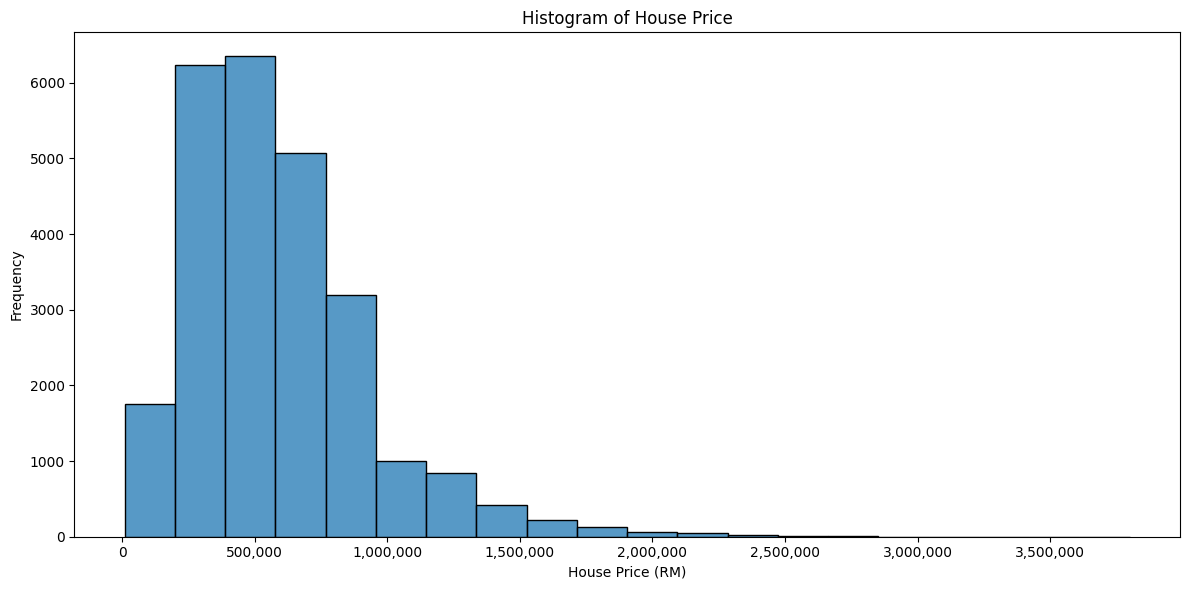

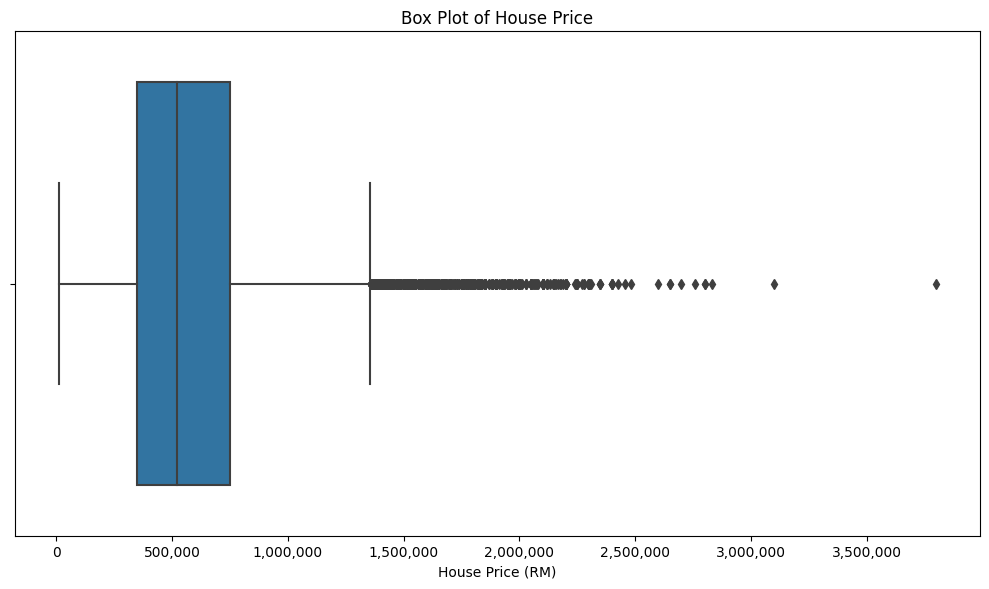

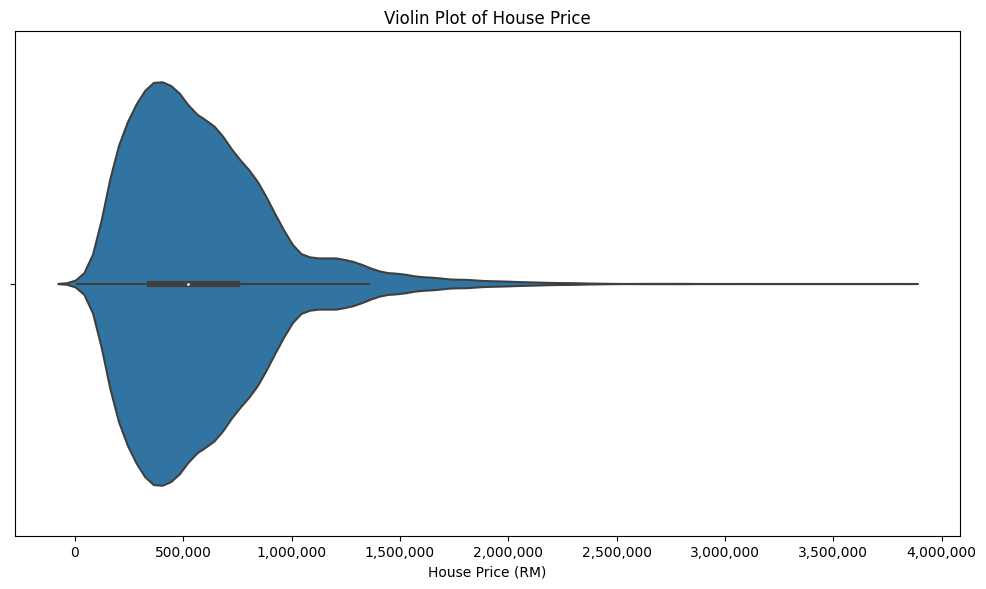

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Define format_with_commas function
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['HOUSE PRICE'], bins=20)
plt.xlabel('House Price (RM)')
plt.ylabel('Frequency')
plt.title('Histogram of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['HOUSE PRICE'])
plt.xlabel('House Price (RM)')
plt.title('Box Plot of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.subplots_adjust(bottom=0.15)  # Adjust spacing between labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_cleaned['HOUSE PRICE'])
plt.xlabel('House Price (RM)')
plt.title('Violin Plot of House Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.xticks(rotation=0, wrap=True)  # Wrap x-axis labels
plt.subplots_adjust(bottom=0.15)  # Adjust spacing between labels
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()











*Explore Independent Variables (Numerical)*


<ipython-input-66-c40a00f3d296>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_without_lease_term.corr()


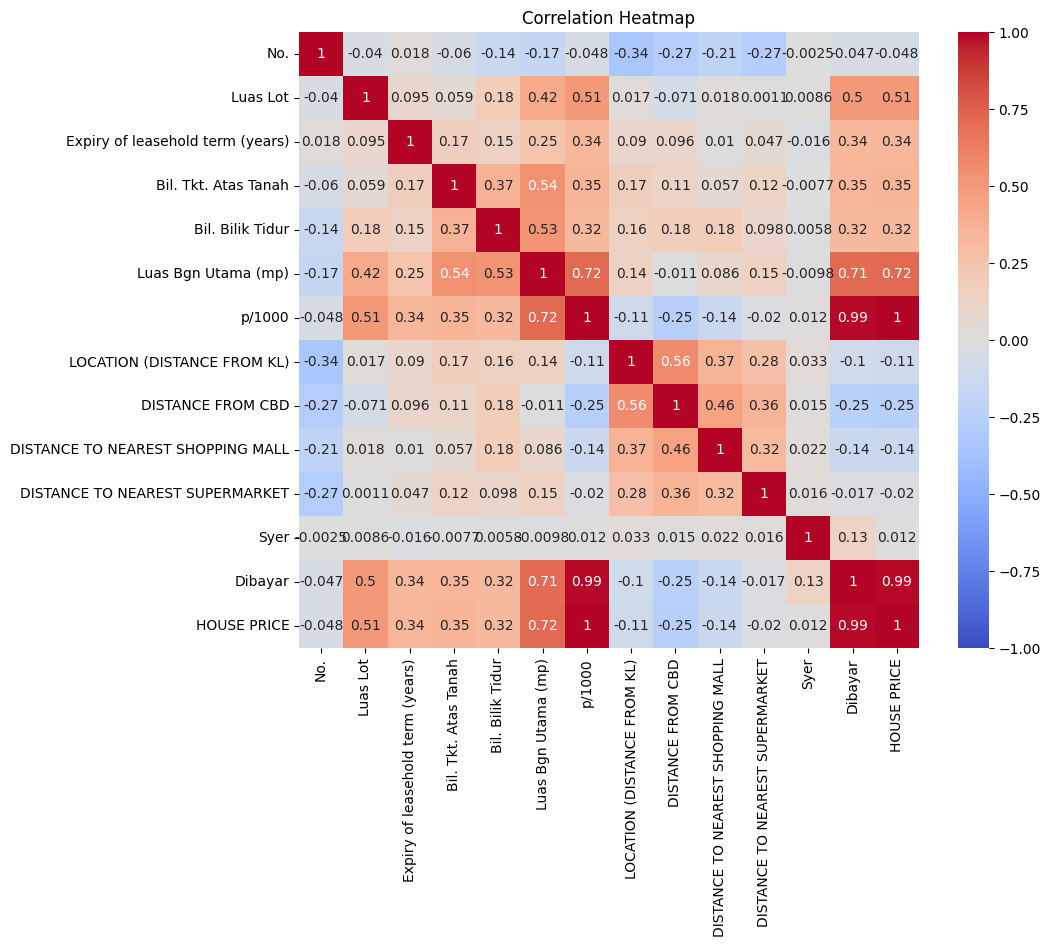

In [ ]:

import seaborn as sns

# Drop the 'Lease Term' column as it has only value '99' showing insufficent variability for correlation
df_without_lease_term = df_cleaned.drop('Lease Term', axis=1)

# Calculate the correlation matrix
correlation_matrix = df_without_lease_term.corr()


# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()





<ipython-input-67-149c6a814682>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_house_price = df_cleaned.corr()['HOUSE PRICE'].drop('HOUSE PRICE')
<ipython-input-67-149c6a814682>:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cmap)


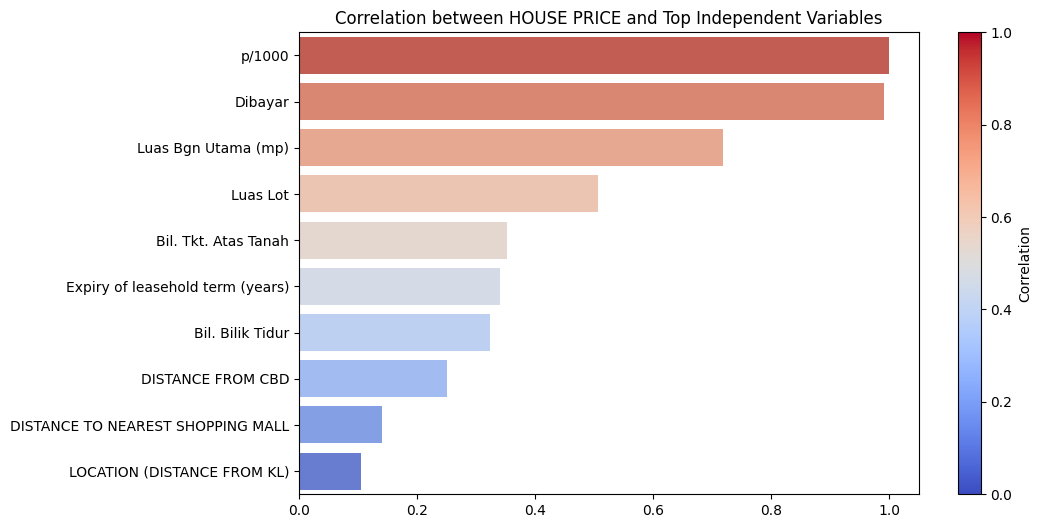

In [ ]:
import matplotlib.cm as cm

# Calculate the correlation between HOUSE PRICE and independent variables
correlation_house_price = df_cleaned.corr()['HOUSE PRICE'].drop('HOUSE PRICE')

# Sort the correlation values in descending order
sorted_corr = correlation_house_price.abs().sort_values(ascending=False)

# Select the top n variables to plot
n = 10
top_variables = sorted_corr[:n]

# Create the bar plot with seaborn using reversed "coolwarm" colormap
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_variables.values, y=top_variables.index, palette='coolwarm_r')

# Create a ScalarMappable object for the colorbar
cmap = cm.ScalarMappable(cmap='coolwarm')
cmap.set_array([])  # Set an empty array

# Add colorbar legend
cbar = plt.colorbar(cmap)
cbar.set_label('Correlation', rotation=90)

# Set the title of the plot
plt.title('Correlation between HOUSE PRICE and Top Independent Variables')

plt.show()






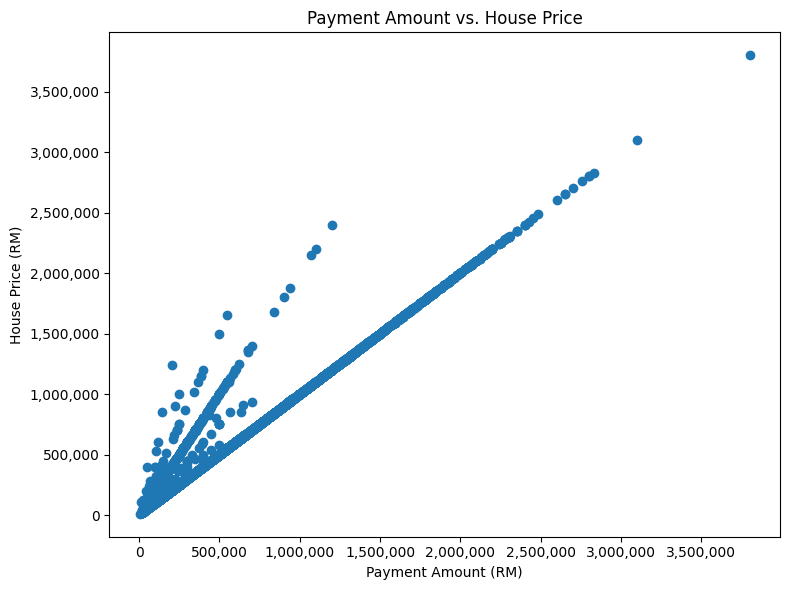

In [ ]:
# Convert 'Dibayar' column to numeric type (assuming it contains numeric values)
df_cleaned['Dibayar'] = pd.to_numeric(df_cleaned['Dibayar'], errors='coerce')

# Format the x-axis and y-axis tick labels
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned['Dibayar'], df_cleaned['HOUSE PRICE'])
plt.xlabel('Payment Amount (RM)')
plt.ylabel('House Price (RM)')
plt.title('Payment Amount vs. House Price')

# Set the x-axis and y-axis tick label format
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

plt.tight_layout()
plt.show()


*Explore Independent Variables (Catgorical)*

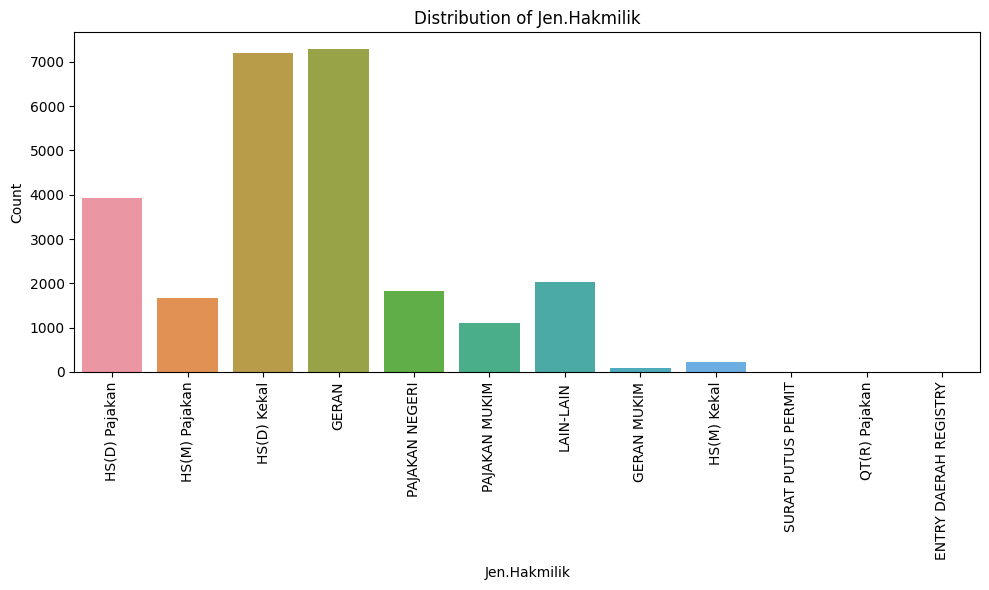

In [ ]:
# Example code for rotating x-axis labels in a bar plot
import seaborn as sns

# Specify the categorical column to visualize
categorical_column = 'Jen.Hakmilik'

# Create a bar plot with rotated x-axis labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title('Distribution of ' + categorical_column)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust plot layout to prevent overlapping
plt.show()



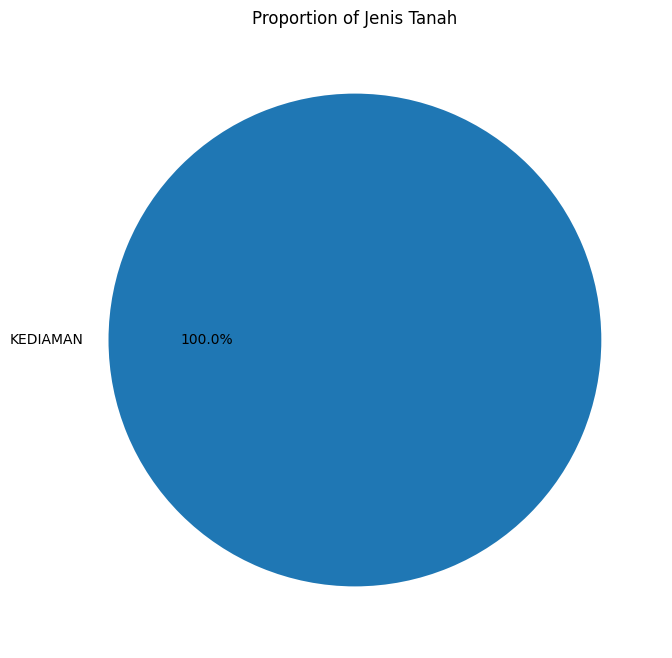

In [ ]:
# Example code for a pie chart using matplotlib
import matplotlib.pyplot as plt

# Specify the categorical column to visualize
categorical_column = 'Jenis Tanah'

# Compute the value counts for each category
category_counts = df_cleaned[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Proportion of ' + categorical_column)
plt.show()



<Figure size 1000x600 with 0 Axes>

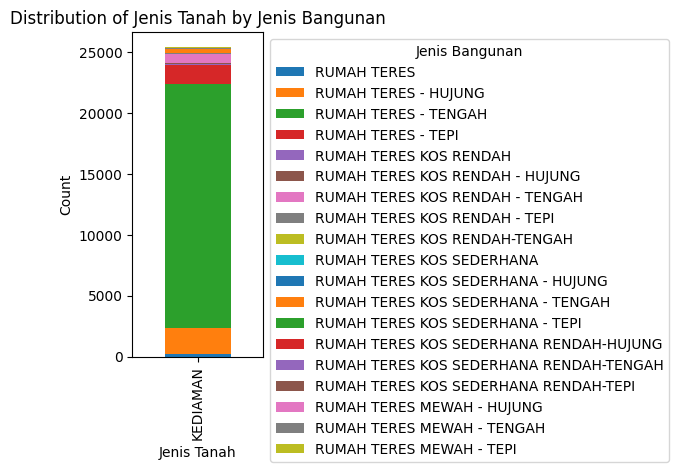

In [ ]:
# Stacked bar plot

# Specify the categorical columns to visualize
categorical_columns = ['Jenis Tanah', 'Jenis Bangunan']

# Compute the cross-tabulation of the two columns
cross_tab = pd.crosstab(df_cleaned[categorical_columns[0]], df_cleaned[categorical_columns[1]])

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', stacked=True)
plt.xlabel(categorical_columns[0])
plt.ylabel('Count')
plt.title('Distribution of ' + categorical_columns[0] + ' by ' + categorical_columns[1])

# Adjust the legend position and title
plt.legend(title=categorical_columns[1], bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust plot layout to prevent overlapping

plt.show()





<Figure size 1200x600 with 0 Axes>

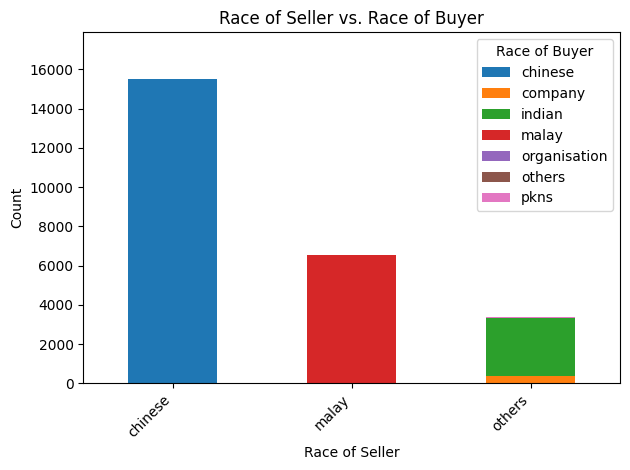

In [ ]:
# Stacked Plot

# Create a cross-tabulation of the two columns
cross_tab = pd.crosstab(df_cleaned['race penjual'], df_cleaned['race pembeli'])

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
ax = cross_tab.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Race of Seller')
plt.ylabel('Count')
plt.title('Race of Seller vs. Race of Buyer')



# Rotate x-axis labels and adjust figure layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adjust the legend position and title
plt.legend(title='Race of Buyer', bbox_to_anchor=(1, 1))

# Adjust y-axis limits for better visibility
plt.ylim(0, ax.get_ylim()[1] * 1.1)

plt.show()





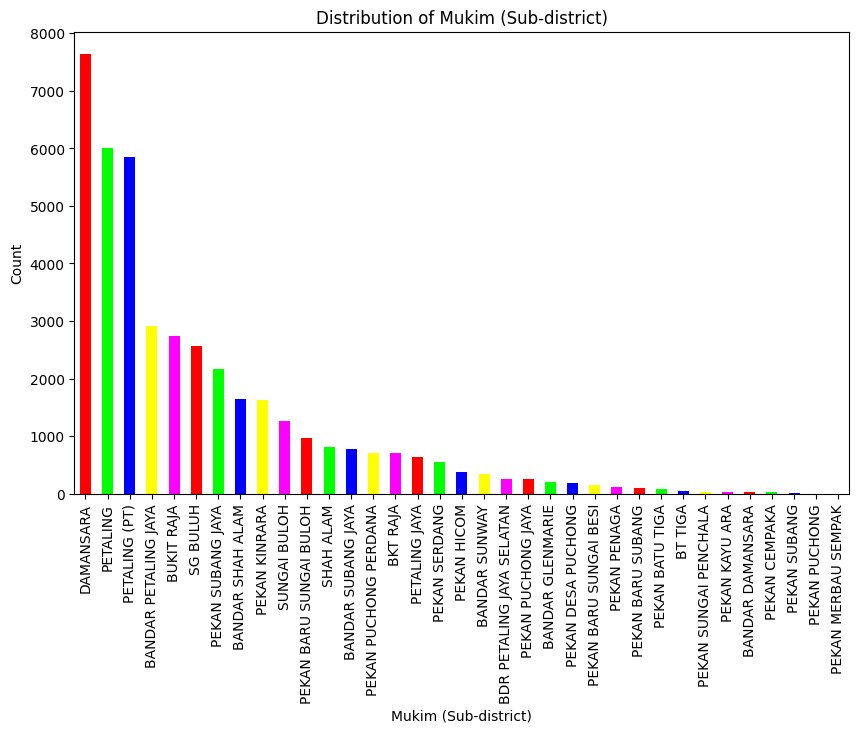

In [ ]:
# Define a custom color palette with solid colors
color_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF']

# Bar Plot
plt.figure(figsize=(10, 6))
df['Mukim (Sub-district)'].value_counts().plot(kind='bar', color=color_palette)
plt.xlabel('Mukim (Sub-district)')
plt.ylabel('Count')
plt.title('Distribution of Mukim (Sub-district)')
plt.show()


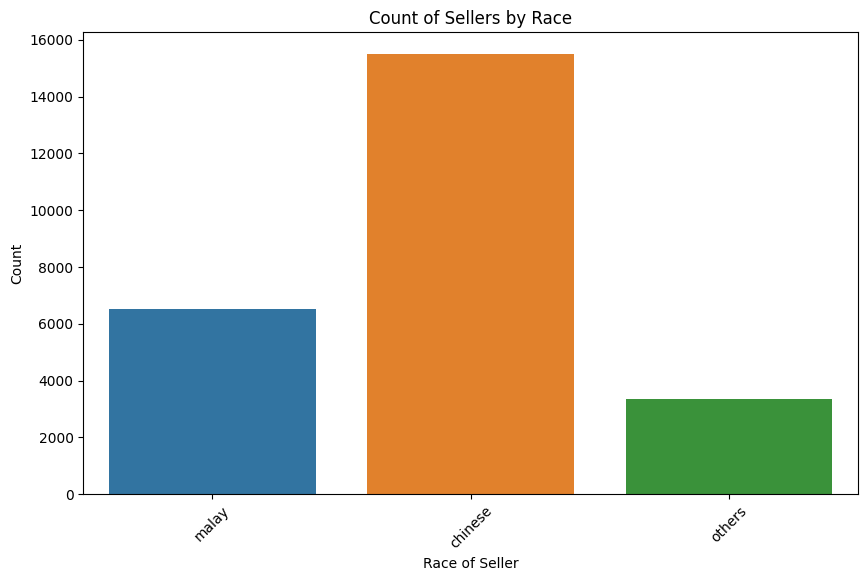

In [ ]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='race penjual', data=df_cleaned)
plt.xlabel('Race of Seller')
plt.ylabel('Count')
plt.title('Count of Sellers by Race')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

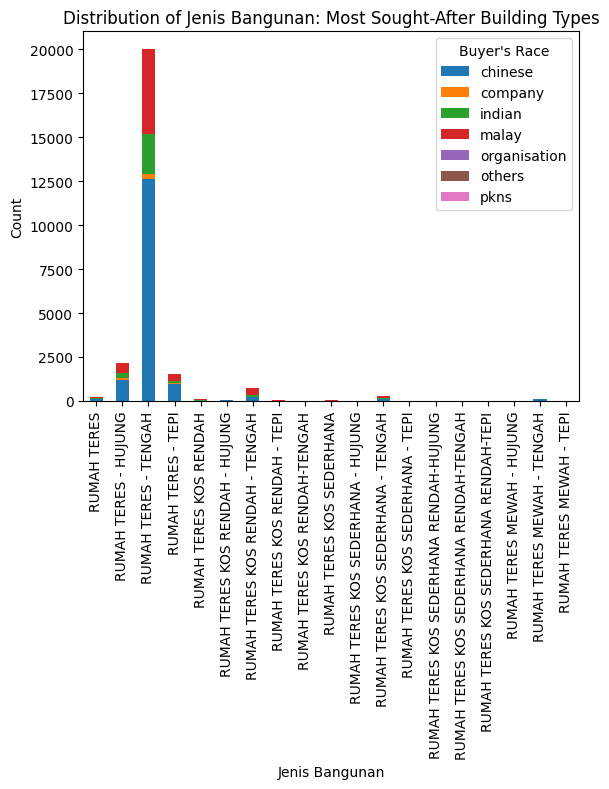

<Figure size 1200x600 with 0 Axes>

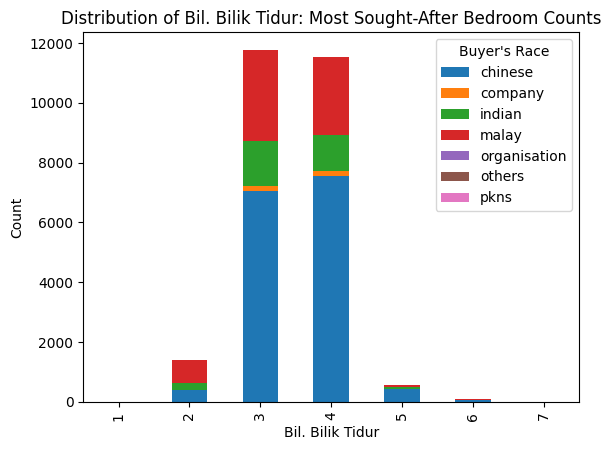

<Figure size 1200x600 with 0 Axes>

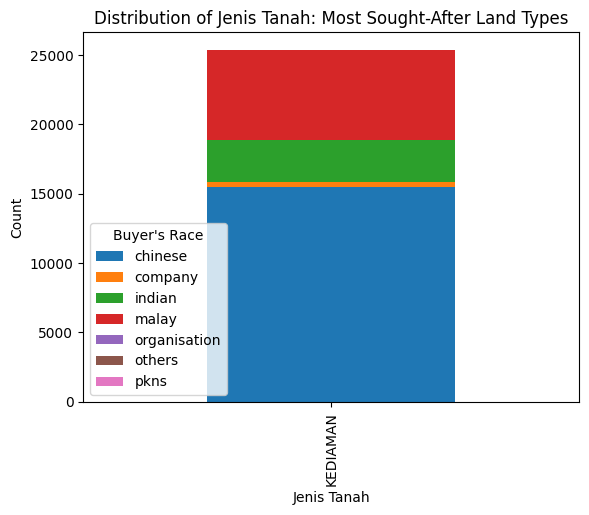

<Figure size 1200x600 with 0 Axes>

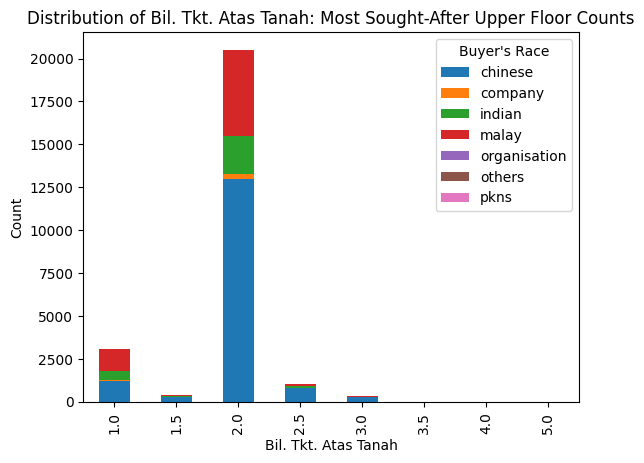

<Figure size 1200x600 with 0 Axes>

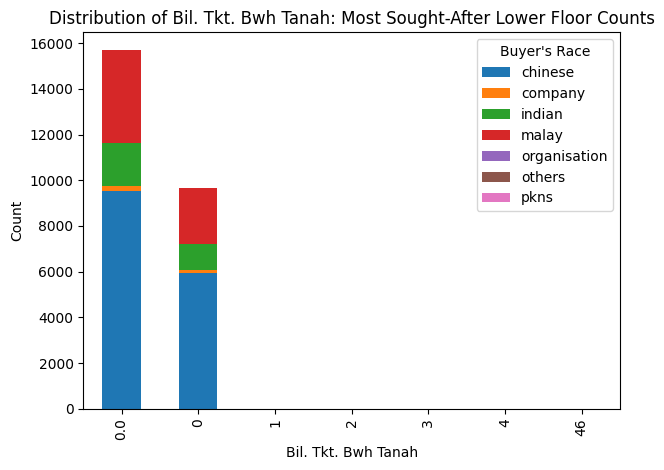

In [ ]:

# Show which house features are highly sought after

# Compute the cross-tabulation for each feature
cross_tab_jenis_bangunan = pd.crosstab(df_cleaned['Jenis Bangunan'], df_cleaned['race pembeli'])
cross_tab_bilik_tidur = pd.crosstab(df_cleaned['Bil. Bilik Tidur'], df_cleaned['race pembeli'])
cross_tab_jenis_tanah = pd.crosstab(df_cleaned['Jenis Tanah'], df_cleaned['race pembeli'])
cross_tab_bil_tkt_atas_tanah = pd.crosstab(df_cleaned['Bil. Tkt. Atas Tanah'], df_cleaned['race pembeli'])
cross_tab_bil_tkt_bwh_tanah = pd.crosstab(df_cleaned['Bil. Tkt. Bwh Tanah'], df_cleaned['race pembeli'])

# Plot 1: Distribution of Jenis Bangunan
plt.figure(figsize=(12, 6))
cross_tab_jenis_bangunan.plot(kind='bar', stacked=True)
plt.xlabel('Jenis Bangunan')
plt.ylabel('Count')
plt.title('Distribution of Jenis Bangunan: Most Sought-After Building Types')
plt.legend(title="Buyer's Race")

# Plot 2: Distribution of Bil. Bilik Tidur
plt.figure(figsize=(12, 6))
cross_tab_bilik_tidur.plot(kind='bar', stacked=True)
plt.xlabel('Bil. Bilik Tidur')
plt.ylabel('Count')
plt.title('Distribution of Bil. Bilik Tidur: Most Sought-After Bedroom Counts')
plt.legend(title="Buyer's Race")

# Plot 3: Distribution of Jenis Tanah
plt.figure(figsize=(12, 6))
cross_tab_jenis_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Jenis Tanah')
plt.ylabel('Count')
plt.title('Distribution of Jenis Tanah: Most Sought-After Land Types')
plt.legend(title="Buyer's Race")

# Plot 4: Distribution of Bil. Tkt. Atas Tanah
plt.figure(figsize=(12, 6))
cross_tab_bil_tkt_atas_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Bil. Tkt. Atas Tanah')
plt.ylabel('Count')
plt.title('Distribution of Bil. Tkt. Atas Tanah: Most Sought-After Upper Floor Counts')
plt.legend(title="Buyer's Race")

# Plot 5: Distribution of Bil. Tkt. Bwh Tanah
plt.figure(figsize=(12, 6))
cross_tab_bil_tkt_bwh_tanah.plot(kind='bar', stacked=True)
plt.xlabel('Bil. Tkt. Bwh Tanah')
plt.ylabel('Count')
plt.title('Distribution of Bil. Tkt. Bwh Tanah: Most Sought-After Lower Floor Counts')
plt.legend(title="Buyer's Race")

plt.tight_layout()
plt.show()




*Explore Targeted Variable VS Independent Variables*

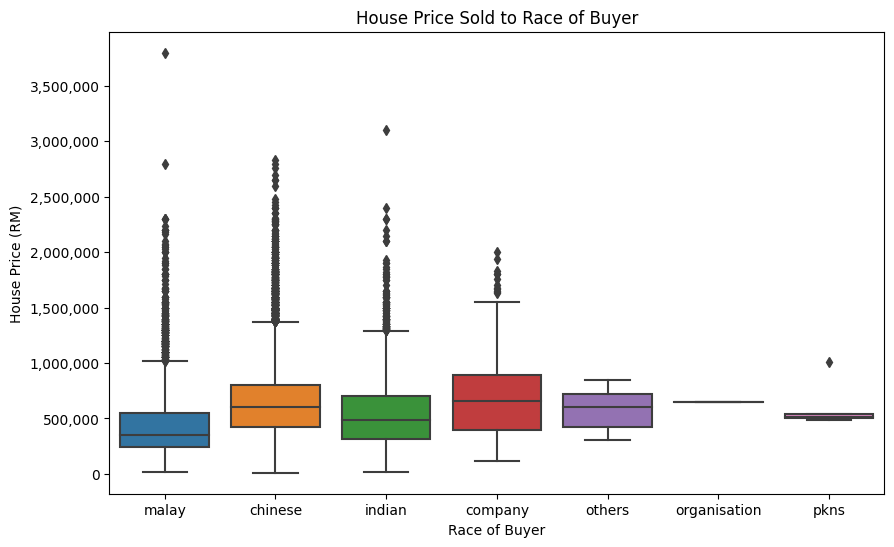

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Format x-axis tick labels to display actual values with commas
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race pembeli', y='HOUSE PRICE', data=df_cleaned)
plt.xlabel('Race of Buyer')
plt.ylabel('House Price (RM)')
plt.title('House Price Sold to Race of Buyer')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

# Show the plot
plt.show()






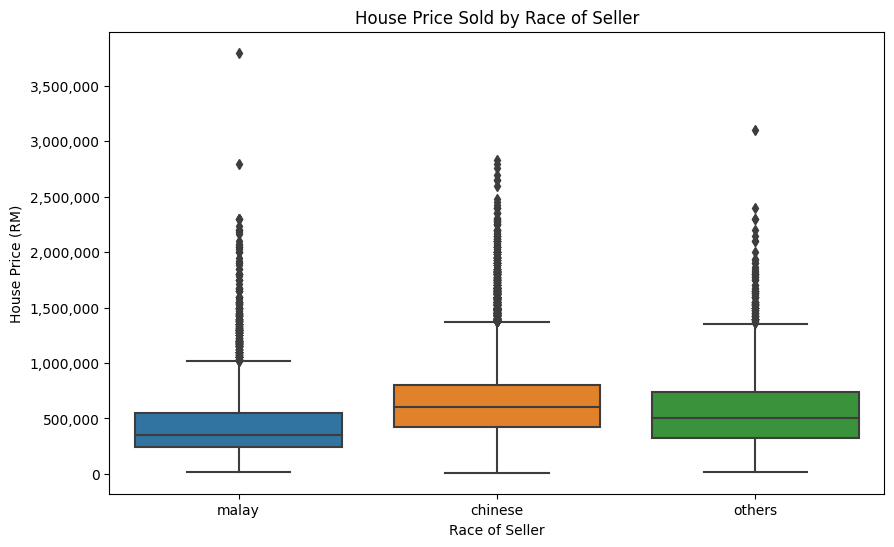

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Format x-axis tick labels to display actual values with commas
def format_with_commas(x, pos):
    return "{:,.0f}".format(x)

# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='race penjual', y='HOUSE PRICE', data=df_cleaned)
plt.xlabel('Race of Seller')
plt.ylabel('House Price (RM)')
plt.title('House Price Sold by Race of Seller')

# Format y-axis labels with commas
ax.yaxis.set_major_formatter(mtick.FuncFormatter(format_with_commas))

# Show the plot
plt.show()






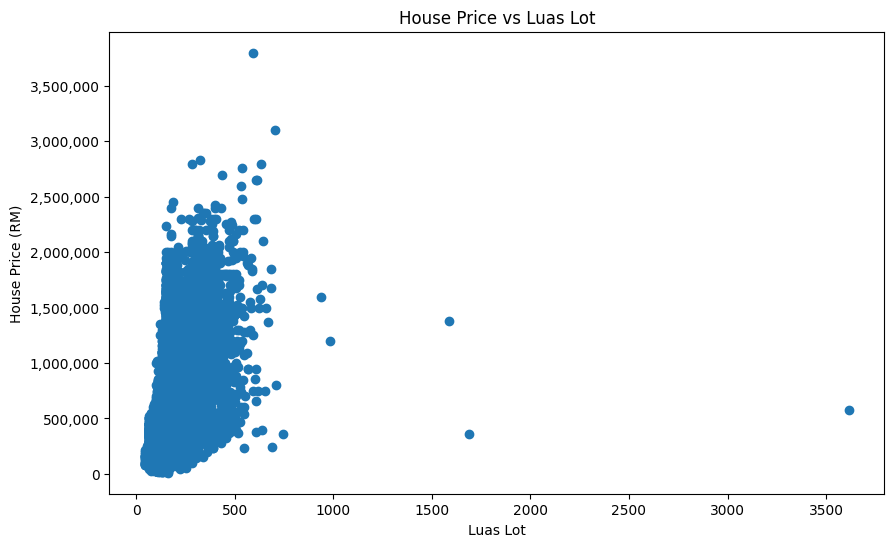

In [ ]:

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Luas Lot'], df_cleaned['HOUSE PRICE'])

# Format y-axis tick labels with commas and "(RM)" prefix
formatter = mtick.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Luas Lot')
plt.ylabel('House Price (RM)')
plt.title('House Price vs Luas Lot')

plt.show()


**Split Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into input features (X) and target variable (y)
X = df_cleaned.drop('HOUSE PRICE', axis=1)
y = df_cleaned['HOUSE PRICE']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
print(X.shape)
print(y.shape)


(25366, 34)
(25366,)


**Data Transformation**

*Feature Scaling, Encoding, Pre-processing Transformer*



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Convert numerical values in categorical columns to strings
X_train[categorical_cols] = X_train[categorical_cols].astype(str)
X_val[categorical_cols] = X_val[categorical_cols].astype(str)
X_test[categorical_cols] = X_test[categorical_cols].astype(str)

# Create the transformers for feature scaling and one-hot encoding
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and apply the preprocessing steps to X_train
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply the preprocessing steps to X_val and X_test
X_val_preprocessed = preprocessor.transform(X_val)
X_test_preprocessed = preprocessor.transform(X_test)


# Print the shapes and ratios of the resulting datasets
print("Training set:")
print("Shape:", X_train_preprocessed.shape)
print("Ratio:", X_train_preprocessed.shape[0] / X.shape[0])

print("\nValidation set:")
print("Shape:", X_val_preprocessed.shape)
print("Ratio:", X_val_preprocessed.shape[0] / X.shape[0])

print("\nTest set:")
print("Shape:", X_test_preprocessed.shape)
print("Ratio:", X_test_preprocessed.shape[0] / X.shape[0])

# Print information about the datasets
print("\nTraining set info:")
print(X_train.info())

print("\nValidation set info:")
print(X_val.info())

print("\nTest set info:")
print(X_test.info())


Training set:
Shape: (16233, 47955)
Ratio: 0.6399511156666404

Validation set:
Shape: (4059, 47955)
Ratio: 0.16001734605377277

Test set:
Shape: (5074, 47955)
Ratio: 0.20003153827958686

Training set info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233 entries, 33708 to 38220
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               16233 non-null  object 
 1   No.                                16233 non-null  int64  
 2   Mukim (Sub-district)               16233 non-null  object 
 3   Jen                                16233 non-null  object 
 4   No.Lot/Plot                        16233 non-null  object 
 5   Siri/Status Lot (Nov-08)           16233 non-null  object 
 6   Tarikh                             16233 non-null  object 
 7   Luas Lot                           16233 non-null  float64
 8   Unit                               1

**Baseline Model**

In [ ]:
from sklearn.metrics import mean_squared_error

# Create a baseline model that predicts the mean value of the target variable for all instances
baseline_predictions = [y_train.mean()] * len(y_test)

# Calculate the mean squared error of the baseline model
baseline_mse = mean_squared_error(y_test, baseline_predictions)

print("Baseline Mean Squared Error:", baseline_mse)



Baseline Mean Squared Error: 112914576211.93152


**Feature Selection**

In [ ]:

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Perform feature selection using SelectKBest with f_regression scoring
k = min(10, X_train_preprocessed.shape[1])  # Limit k to the number of available features
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train_preprocessed, y_train)
X_val_selected = selector.transform(X_val_preprocessed)
X_test_selected = selector.transform(X_test_preprocessed)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = (
    list(numerical_cols) +
    preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)[selected_indices - len(numerical_cols)].tolist()
)

# Train a Linear Regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Make predictions on the validation set and calculate the mean squared error
y_val_pred = model.predict(X_val_selected)
mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse)
print("\n")

# Sort selected feature names based on importance scores
selected_features_with_scores = sorted(zip(selected_feature_names, selector.scores_[selected_indices]), key=lambda x: x[1], reverse=True)
sorted_selected_feature_names = [feature for feature, _ in selected_features_with_scores]
sorted_scores = [score for _, score in selected_features_with_scores]

# Print the selected feature names and their importance scores in descending order
print("Selected Features and Their Importance Scores:")
print("----------------")
for feature, score in zip(sorted_selected_feature_names, sorted_scores):
    print(f"{feature}: {score:.2f}")




Mean Squared Error on Validation Set: 0.010017613377398558


Selected Features and Their Importance Scores:
----------------
Luas Bgn Utama (mp): 1522873448996869632.00
p/1000: 789199.17
Bil. Tkt. Atas Tanah: 17025.82
Luas Lot: 5306.55
Expiry of leasehold term (years): 2273.01
Lease Term: 2137.49
DISTANCE FROM CBD: 1970.52
DISTANCE TO NEAREST SUPERMARKET: 1970.52
LOCATION (DISTANCE FROM KL): 1970.52
DISTANCE TO NEAREST SHOPPING MALL: 1970.52


# **Model Selection**

**Hyperparameter Tuning & K-fold Cross Validation**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grids for tuning
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Ridge hyperparameter grid
lasso_param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Lasso hyperparameter grid
rf_param_grid = {'n_estimators': [100, 200, 500]}  # Random Forest hyperparameter grid
svr_param_grid = {'C': [0.1, 1.0, 10.0], 'kernel': ['linear']}  # SVR hyperparameter grid

# Create the models
ridge_model = Ridge()  # Ridge regression model
lasso_model = Lasso()  # Lasso regression model
rf_model = RandomForestRegressor()  # Random Forest regression model
svr_model = SVR()  # SVR model

# Define a list of models and their associated parameter grids
models = [
    (ridge_model, ridge_param_grid, 'Ridge Regression', 'alpha'),
    (lasso_model, lasso_param_grid, 'Lasso Regression', 'alpha'),
    (rf_model, rf_param_grid, 'Random Forest', 'n_estimators'),
    (svr_model, svr_param_grid, 'Support Vector Regression', 'C')
]

# Define the number of folds for cross-validation
n_folds = 5

# Iterate over the models and perform GridSearchCV for hyperparameter tuning with k-fold cross-validation
best_models = []
for model, param_grid, model_name, alpha_param_name in models:
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds))
    grid_search.fit(X_train_selected, y_train)

    # Get the best model and its associated hyperparameters
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_.get(alpha_param_name)

    # Perform cross-validation on the best model
    cv_scores = cross_val_score(best_model, X_train_selected, y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds))

    # Calculate the mean and standard deviation of the cross-validation scores
    cv_mean = -cv_scores.mean()
    cv_std = cv_scores.std()

    # Store the best model and its performance
    best_models.append((best_model, cv_mean, cv_std, best_alpha, model_name))

# Sort the best models based on mean squared error
best_models.sort(key=lambda x: x[1])

# Print the best models and their associated hyperparameters
for i, (model, cv_mean, cv_std, alpha, model_name) in enumerate(best_models):
    print(f"Model {i+1}: {model_name}")
    print("Best Model:", model)
    print("Cross-Validation Mean Squared Error:", cv_mean)
    print("Cross-Validation Standard Deviation:", cv_std)
    print("Best Alpha/C:", alpha)
    print("\n")

    # Perform cross-validation on the best model and display the scores
    cv_scores = cross_val_score(model, X_train_selected, y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=n_folds))
    print("Cross-Validation Scores:")
    for fold, score in enumerate(cv_scores):
        print(f"Fold {fold+1}: {score}")
    print("\n")



Model 1: Lasso Regression
Best Model: Lasso(alpha=10.0)
Cross-Validation Mean Squared Error: 94.87221957335075
Cross-Validation Standard Deviation: 16.02037759634684
Best Alpha/C: 10.0


Cross-Validation Scores:
Fold 1: -79.54279454928916
Fold 2: -73.5961140025938
Fold 3: -98.59887269219891
Fold 4: -115.85039802149673
Fold 5: -106.77291860117514


Model 2: Ridge Regression
Best Model: Ridge(alpha=0.1)
Cross-Validation Mean Squared Error: 2267.5844100227614
Cross-Validation Standard Deviation: 1394.807883590678
Best Alpha/C: 0.1


Cross-Validation Scores:
Fold 1: -1180.8890591742197
Fold 2: -4435.797675378076
Fold 3: -491.7743743820144
Fold 4: -3089.5291403426227
Fold 5: -2139.9318008368764


Model 3: Random Forest
Best Model: RandomForestRegressor(n_estimators=500)
Cross-Validation Mean Squared Error: 63554094.78980987
Cross-Validation Standard Deviation: 102101406.0329894
Best Alpha/C: 500


Cross-Validation Scores:
Fold 1: -272701357.0853486
Fold 2: -3355370.881563227
Fold 3: -366881

In [ ]:
# Find the highest performing model based on cross-validation mean squared error
best_model_index = 0
for i, (_, cv_mean, _, _, _) in enumerate(best_models):
    if cv_mean < best_models[best_model_index][1]:
        best_model_index = i

# Get information about the highest performing model
best_model = best_models[best_model_index][0]
best_model_name = best_models[best_model_index][4]  # Update the index to 4
best_model_alpha = best_models[best_model_index][3]

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test_selected)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the results
print("Model Evaluation Results:")
print("-------------------------")
for i, (model, cv_mean, cv_std, alpha, model_name) in enumerate(best_models):
    print(f"Model {i+1}: {model_name}")
    print("  Best Alpha/C:", alpha)
    print("  Cross-Validation Mean Squared Error:", cv_mean)
    print("  Cross-Validation Standard Deviation:", cv_std)
    print()

print("\nHighest Performing Model (Evaluated on Test Set):")
print("------------------------------------------------")
print("Model:", best_model_name)
print("Best Alpha/C:", best_model_alpha)
print("Mean Squared Error on Test Set:", mse_test)



Model Evaluation Results:
-------------------------
Model 1: Lasso Regression
  Best Alpha/C: 10.0
  Cross-Validation Mean Squared Error: 94.87221957335075
  Cross-Validation Standard Deviation: 16.02037759634684

Model 2: Ridge Regression
  Best Alpha/C: 0.1
  Cross-Validation Mean Squared Error: 2267.5844100227614
  Cross-Validation Standard Deviation: 1394.807883590678

Model 3: Random Forest
  Best Alpha/C: 500
  Cross-Validation Mean Squared Error: 63554094.78980987
  Cross-Validation Standard Deviation: 102101406.0329894

Model 4: Support Vector Regression
  Best Alpha/C: 10.0
  Cross-Validation Mean Squared Error: 15463850673.202374
  Cross-Validation Standard Deviation: 1462594534.563432


Highest Performing Model (Evaluated on Test Set):
------------------------------------------------
Model: Lasso Regression
Best Alpha/C: 10.0
Mean Squared Error on Test Set: 107.75748800384466


# **Model Training**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Set the best hyperparameters for Lasso Regression
best_alpha = 1.0

# Create the Lasso Regression model with the best hyperparameters
lasso_model = Lasso(alpha=best_alpha)

# Train the model on the training set
lasso_model.fit(X_train_selected, y_train)

# Evaluate the model on the training set
train_predictions = lasso_model.predict(X_train_selected)
train_mse = mean_squared_error(y_train, train_predictions)
print("Mean Squared Error on Training Set:", train_mse)

# Evaluate the model on the validation set
val_predictions = lasso_model.predict(X_val_selected)
val_mse = mean_squared_error(y_val, val_predictions)
print("Mean Squared Error on Validation Set:", val_mse)

# Evaluate the model on the test set
test_predictions = lasso_model.predict(X_test_selected)
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on Test Set:", test_mse)

# Print the predictions
print("Predictions on Test Set:")
print(test_predictions)


Mean Squared Error on Training Set: 17194.719311027093
Mean Squared Error on Validation Set: 17943.320737296282
Mean Squared Error on Test Set: 16529.393785268698
Predictions on Test Set:
[ 550004.14890047  278910.6380873   599979.20666565 ...  725109.89072136
  319760.4619115  1099975.55958778]


# **Model Evaluation**

In [ ]:
r2_score = lasso_model.score(X_test_selected, y_test)
print("R-squared Score:", r2_score)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, test_predictions)
print("Mean Absolute Error:", mae)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, test_predictions, squared=False)
print("Root Mean Squared Error:", rmse)

R-squared Score: 0.9999998535584133
Mean Absolute Error: 75.58451854012291
Root Mean Squared Error: 128.56669002999453


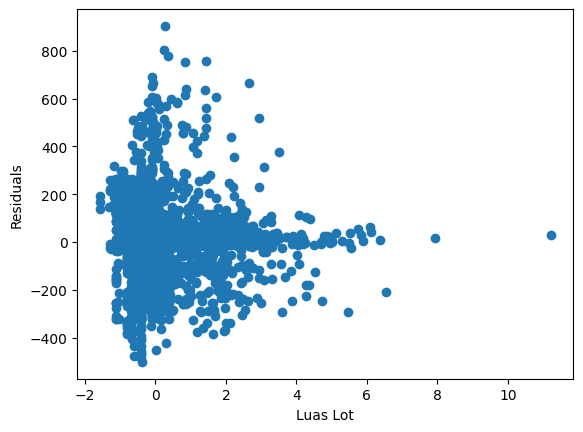

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - test_predictions

# Get the selected feature indices and names
selected_indices = selector.get_support(indices=True)
selected_feature_names = [
    selected_feature_names[i] for i in selected_indices if i < len(selected_feature_names)
]

# Define X_test_selected based on your specific use case
X_test_selected = selector.transform(X_test_preprocessed)

# Convert the sparse matrix to a dense matrix
X_test_selected_dense = X_test_selected.toarray()

# Plot the residuals against each selected feature
for i, feature in enumerate(selected_feature_names):
    feature_values = X_test_selected_dense[:, i]
    if len(feature_values) == len(residuals):
        plt.scatter(feature_values, residuals)
        plt.xlabel(feature)
        plt.ylabel("Residuals")
        plt.show()

    else:
        print(f"Error: Mismatch in sizes for feature '{feature}'")





# **Housing Price Simulator**

In [ ]:
from joblib import dump
# Save the trained model to a file
dump(lasso_model, 'lasso_model.joblib')



In [ ]:
from joblib import load

# Load the saved model from file
loaded_model = load('lasso_model.joblib')